In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# import fastai
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

from pathlib import Path

In [4]:
PATH = "data/data-science-bowl-2018/"
arch=resnet34
sz=224
bs=64

In [5]:
%ls '{PATH}00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png'


data/data-science-bowl-2018/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png*


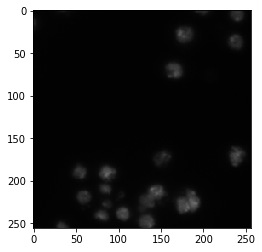

In [21]:
img = plt.imread(f'{PATH}00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png')
plt.imshow(img, interpolation='none', cmap='gray')

fol = f'{PATH}00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks'
p = f'{fol}/07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png'
# mask = plt.imread(p)
# plt.imshow(mask, alpha=0.5)

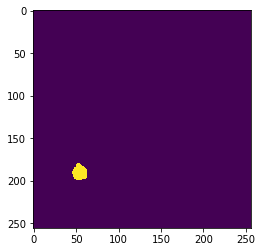

In [7]:
fol = f'{PATH}00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks'
p = f'{fol}/07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png'
img = plt.imread(p)
plt.imshow(img)

In [9]:
path = Path(f'{PATH}'); # list(path.iterdir())

In [10]:
pics = {}
idx = ''

for samples in list(path.iterdir()):
    sample = {}
    masks = []
    if(samples.is_dir()):
        for folders in list(samples.iterdir()):
            
            
            if(folders.name == 'images'):
                for p in list(folders.iterdir()):
                    idx = str(p).split('/')[-1].replace('.png', '')
                    sample['image'] = str(p)
#                     pics[idx] = sample
#                     print('images')
            if(folders.name == 'masks'):
                for m in list(folders.iterdir()):
                    masks.append(str(m))
#                     print('masks')
        sample['masks'] = masks
        pics[idx] = sample
#         print(pics[idx])

In [14]:
len(pics)
pictures = list(map(lambda i: pics[i]['image'], pics));
masks = list(map(lambda i: pics[i]['masks'], pics)); len(masks[1])

114

In [16]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

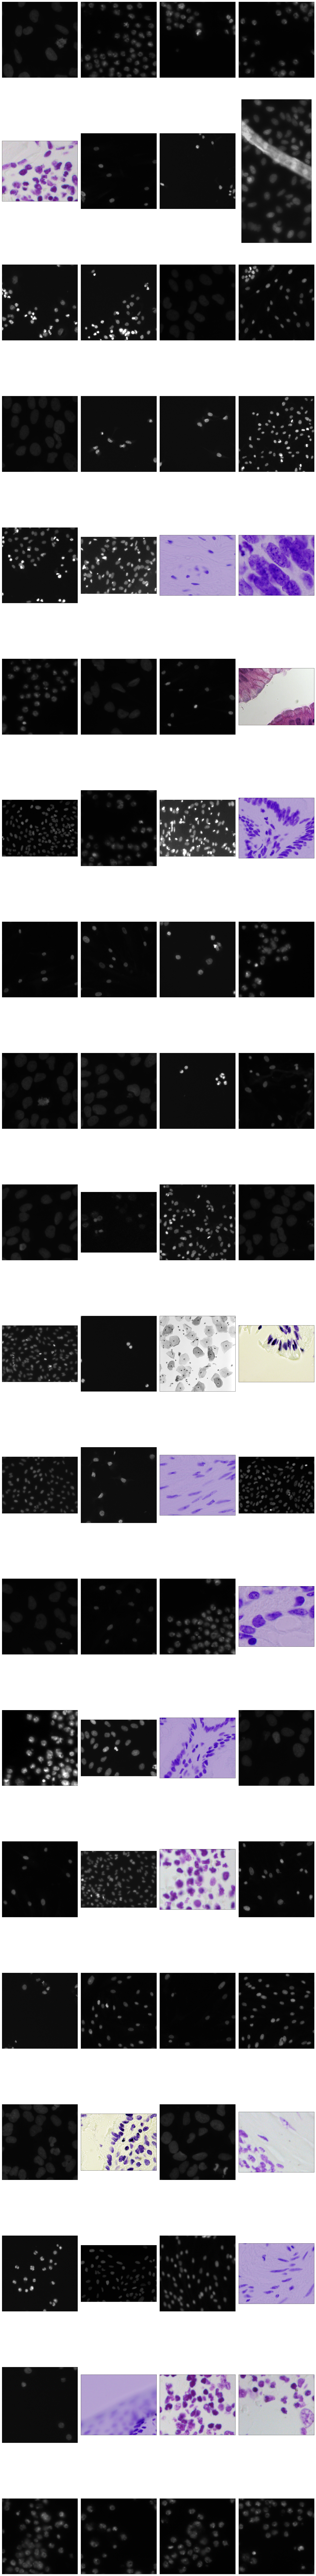

In [20]:
fig, axes = plt.subplots(20, 4, figsize=(24, 200))
for i,ax in enumerate(axes.flat):
    ima = plt.imread(pictures[i+200])
#     b = md.classes[preds[i]]
    ax = show_img(ima, ax=ax)
#     for mask in masks[i]:
#         ax.imshow(plt.imread(mask), alpha=0.1)
#     draw_text(ax, (0,0), b)
plt.tight_layout()

ModuleNotFoundError: No module named 'pillow'

In [132]:
df = pd.read_csv(f'{PATH}stage1_train_labels.csv'); df

ImageId  \
0      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
1      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
2      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
3      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
4      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
5      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
6      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
7      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
8      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
9      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
10     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
11     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
12     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
13     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
14     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
15     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
16     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
17     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
18     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
19     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
20     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
21     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
22     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
23     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
24     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
25     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
26     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
27     003cee89357d9fe13516167fd67b609a164651b2193458...   
28     003cee89357d9fe13516167fd67b609a164651b2193458...   
29     003cee89357d9fe13516167fd67b609a164651b2193458...   
...                                                  ...   
29431  ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...   
29432  ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...   
29433  ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...   
29434  ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...   
29435  ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...   
29436  ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...   
29437  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29438  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29439  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29440  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29441  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29442  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29443  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29444  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29445  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29446  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29447  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29448  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29449  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29450  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29451  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29452  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29453  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29454  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29455  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29456  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29457  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29458  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29459  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29460  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   

                                           EncodedPixels  
0      6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...  
1      36269 7 36523 11 36778 13 37033 15 37288 17 37...  
2      19919 6 20174 8 20429 10 20685 11 20941 12 211...  
3      18671 6 18926 8 19181 9 19436 10 19691 11 1994...  
4                40158 3 40413 5 

In [22]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax